<a href="https://colab.research.google.com/github/anil-kk/deeplearning/blob/master/PyTorch_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim
import matplotlib.pyplot as plt
import numpy as np

# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# download and load training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
## Model

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

##negative log likelihood loss
criterion = nn.NLLLoss()

##stochastic gradient descent
optimizer = optim.SGD(model.parameters(), lr=0.003)

## 1 epoch, one iteration through complete train dataset
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
                    

        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()
        
        # logits, log_probability, forward pass
        log_probs = model.forward(images)
        
        #loss
        loss = criterion(log_probs, labels)
        
        #backward pass
        loss.backward()
        
        #update weights
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.0049380605408884
Training loss: 0.9514784242298557
Training loss: 0.5531918571384222
Training loss: 0.44362607719039104
Training loss: 0.3933099027413295


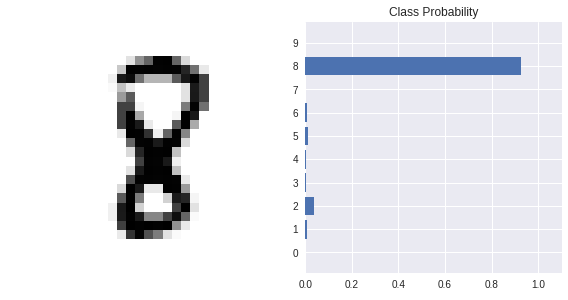

In [10]:
%matplotlib inline
def show(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(8,8), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up
with torch.no_grad():
    logits_log_probs = model.forward(img)

# Output of the network are logits(log probabilities), need to take softmax for probabilities
ps = F.softmax(logits_log_probs, dim=1)
show(img.view(1, 28, 28), ps)